## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
from keras.regularizers import l1, l2, l1_l2

"""
建立神經網路，並加入 L1 或 L2
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], reg=l1, r_ratio= 1e-2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=reg(r_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=reg(r_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [10]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 30
BATCH_SIZE = 256
MOMENTUM = 0.8
regu = [l1, l2, l1_l2]
ratio = [1e-2, 1e-4, 1e-8, 1e-12]

In [14]:
results = {}

for c,regulizer in enumerate(regu):
    for rat in ratio:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with %s Regulizer = %.6f" % (regulizer, rat))
        model = build_mlp(input_shape=x_train.shape[1:], reg=regulizer ,r_ratio=rat)
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = "exp-%s-%s" % (str(c), str(rat))
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}


Experiment with <function l1 at 0x000001437D3F8840> Regulizer = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/3

50000/50000 [==============================] - 12s 246us/step - loss: 5.4509 - acc: 0.4231 - val_loss: 5.4398 - val_acc: 0.4250
Epoch 14/30
50000/50000 [==============================] - 12s 238us/step - loss: 5.4221 - acc: 0.4276 - val_loss: 5.4130 - val_acc: 0.4301
Epoch 15/30
50000/50000 [==============================] - 12s 246us/step - loss: 5.3935 - acc: 0.4326 - val_loss: 5.3900 - val_acc: 0.4320
Epoch 16/30
50000/50000 [==============================] - 12s 241us/step - loss: 5.3655 - acc: 0.4373 - val_loss: 5.3637 - val_acc: 0.4304
Epoch 17/30
50000/50000 [==============================] - 13s 251us/step - loss: 5.3393 - acc: 0.4404 - val_loss: 5.3352 - val_acc: 0.4416
Epoch 18/30
50000/50000 [==============================] - 12s 246us/step - loss: 5.3124 - acc: 0.4442 - val_loss: 5.3261 - val_acc: 0.4338
Epoch 19/30
50000/50000 [==============================] - 12s 244us/step - loss: 5.2862 - acc: 0.4468 - val_loss: 5.2805 - val_acc: 0.4474
Epoch 20/30
50000/50000 [=======

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 12s 232us/step - loss: 2.1423 - acc: 0.2355 - val_loss: 2.0224 - val_acc: 0.2832
Epoch 2/30
50000/50000 [==============================] - 11s 210us/step - loss: 1.9672 - acc: 0.3053 - val_loss: 1.9223 - val_acc: 0.3304
Epoch 3/30
50000/50000 [==============================] - 11s 212us/step - loss: 1.8898 - acc: 0.3366 - val_loss: 1.8644 - val_acc: 0.3456
Epoch 4/30
50000/50000 [==============================] - 11s 219us/step - loss: 1.8423 - acc: 0.3532 - val_loss: 1.8220 - val_acc: 0.3608
Epoch 5/30
50000/50000 [==============================] - 10s 209us/step - loss: 1.8070 - acc: 0.3665 - val_loss: 1.7903 - val_acc: 0.3722
Epoch 6/30
50000/50000 [==============================] - 11s 217us/step - loss: 1.7783 - acc: 0.3783 - val_loss: 1.7648 - val_acc: 0.3844
Epoch 7/30
50000/50000 [==============================] - 11s 223us/step - loss: 1.7541 - acc: 0.3869 - val_loss: 1.

50000/50000 [==============================] - 12s 231us/step - loss: 7.9925 - acc: 0.4235 - val_loss: 7.8724 - val_acc: 0.4228
Epoch 22/30
50000/50000 [==============================] - 11s 211us/step - loss: 7.7524 - acc: 0.4234 - val_loss: 7.6370 - val_acc: 0.4209
Epoch 23/30
50000/50000 [==============================] - 11s 215us/step - loss: 7.5211 - acc: 0.4258 - val_loss: 7.4141 - val_acc: 0.4224
Epoch 24/30
50000/50000 [==============================] - 11s 224us/step - loss: 7.2981 - acc: 0.4276 - val_loss: 7.1912 - val_acc: 0.4237
Epoch 25/30
50000/50000 [==============================] - 13s 263us/step - loss: 7.0841 - acc: 0.4302 - val_loss: 6.9816 - val_acc: 0.4311
Epoch 26/30
50000/50000 [==============================] - 12s 236us/step - loss: 6.8788 - acc: 0.4305 - val_loss: 6.7804 - val_acc: 0.4250
Epoch 27/30
50000/50000 [==============================] - 13s 256us/step - loss: 6.6810 - acc: 0.4314 - val_loss: 6.5846 - val_acc: 0.4308
Epoch 28/30
50000/50000 [=======

50000/50000 [==============================] - 12s 233us/step - loss: 1.9046 - acc: 0.3307 - val_loss: 1.8771 - val_acc: 0.3367
Epoch 4/30
50000/50000 [==============================] - 12s 235us/step - loss: 1.8558 - acc: 0.3502 - val_loss: 1.8396 - val_acc: 0.3550
Epoch 5/30
50000/50000 [==============================] - 12s 234us/step - loss: 1.8223 - acc: 0.3614 - val_loss: 1.8104 - val_acc: 0.3726
Epoch 6/30
50000/50000 [==============================] - 12s 239us/step - loss: 1.7954 - acc: 0.3723 - val_loss: 1.7898 - val_acc: 0.3799
Epoch 7/30
50000/50000 [==============================] - 12s 233us/step - loss: 1.7714 - acc: 0.3824 - val_loss: 1.7667 - val_acc: 0.3796
Epoch 8/30
50000/50000 [==============================] - 12s 235us/step - loss: 1.7503 - acc: 0.3896 - val_loss: 1.7465 - val_acc: 0.3912
Epoch 9/30
50000/50000 [==============================] - 12s 233us/step - loss: 1.7312 - acc: 0.3967 - val_loss: 1.7258 - val_acc: 0.3970
Epoch 10/30
50000/50000 [=============

Epoch 24/30
50000/50000 [==============================] - 13s 252us/step - loss: 1.5155 - acc: 0.4720 - val_loss: 1.5326 - val_acc: 0.4597
Epoch 25/30
50000/50000 [==============================] - 12s 250us/step - loss: 1.5064 - acc: 0.4747 - val_loss: 1.5469 - val_acc: 0.4523
Epoch 26/30
50000/50000 [==============================] - 13s 250us/step - loss: 1.4981 - acc: 0.4773 - val_loss: 1.5255 - val_acc: 0.4636
Epoch 27/30
50000/50000 [==============================] - 13s 252us/step - loss: 1.4901 - acc: 0.4799 - val_loss: 1.5148 - val_acc: 0.4648
Epoch 28/30
50000/50000 [==============================] - 13s 256us/step - loss: 1.4815 - acc: 0.4834 - val_loss: 1.5095 - val_acc: 0.4695
Epoch 29/30
50000/50000 [==============================] - 13s 260us/step - loss: 1.4738 - acc: 0.4835 - val_loss: 1.5147 - val_acc: 0.4645
Epoch 30/30
50000/50000 [==============================] - 12s 248us/step - loss: 1.4651 - acc: 0.4902 - val_loss: 1.5046 - val_acc: 0.4689
Experiment with <fun

50000/50000 [==============================] - 14s 286us/step - loss: 16.2238 - acc: 0.3662 - val_loss: 15.9275 - val_acc: 0.3618
Epoch 7/30
50000/50000 [==============================] - 14s 285us/step - loss: 15.6433 - acc: 0.3735 - val_loss: 15.3597 - val_acc: 0.3693
Epoch 8/30
50000/50000 [==============================] - 14s 284us/step - loss: 15.0867 - acc: 0.3780 - val_loss: 14.8149 - val_acc: 0.3767
Epoch 9/30
50000/50000 [==============================] - 14s 285us/step - loss: 14.5530 - acc: 0.3843 - val_loss: 14.2907 - val_acc: 0.3858
Epoch 10/30
50000/50000 [==============================] - 14s 285us/step - loss: 14.0417 - acc: 0.3897 - val_loss: 13.7937 - val_acc: 0.3859
Epoch 11/30
50000/50000 [==============================] - 14s 281us/step - loss: 13.5508 - acc: 0.3912 - val_loss: 13.3094 - val_acc: 0.3929
Epoch 12/30
50000/50000 [==============================] - 15s 290us/step - loss: 13.0794 - acc: 0.3968 - val_loss: 12.8492 - val_acc: 0.3935
Epoch 13/30
50000/500

50000/50000 [==============================] - 14s 285us/step - loss: 6.8809 - acc: 0.4311 - val_loss: 6.7826 - val_acc: 0.4307
Epoch 27/30
50000/50000 [==============================] - 14s 280us/step - loss: 6.6831 - acc: 0.4314 - val_loss: 6.5929 - val_acc: 0.4306
Epoch 28/30
50000/50000 [==============================] - 14s 284us/step - loss: 6.4920 - acc: 0.4331 - val_loss: 6.4062 - val_acc: 0.4304
Epoch 29/30
50000/50000 [==============================] - 15s 291us/step - loss: 6.3084 - acc: 0.4362 - val_loss: 6.2223 - val_acc: 0.4334
Epoch 30/30
50000/50000 [==============================] - 14s 282us/step - loss: 6.1323 - acc: 0.4356 - val_loss: 6.0521 - val_acc: 0.4338
Experiment with <function l1_l2 at 0x000001437D3F8C80> Regulizer = 0.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
______________________________________

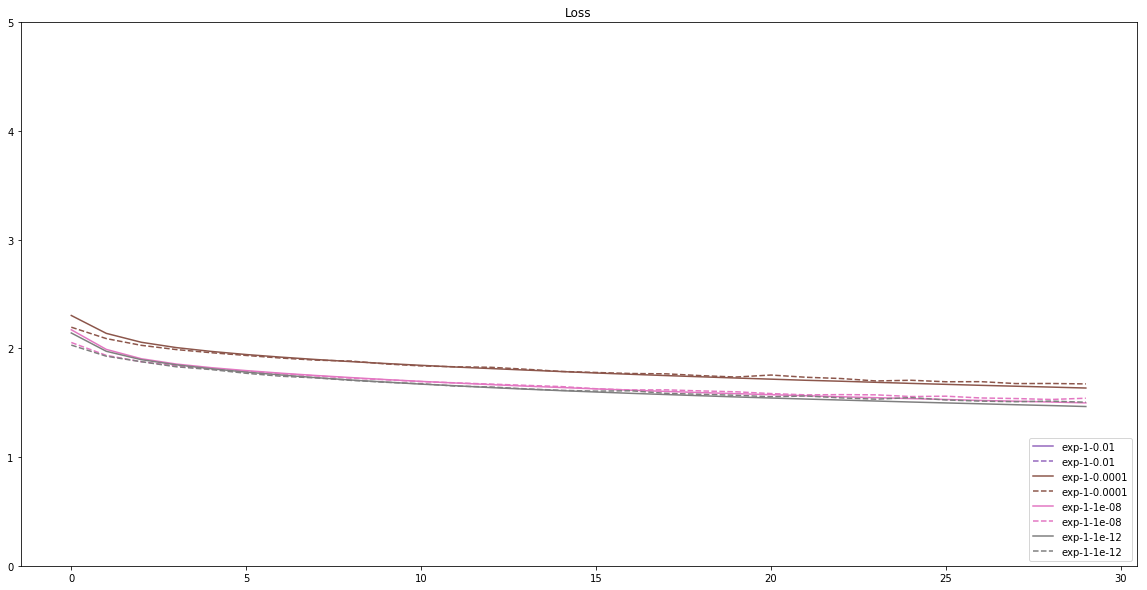

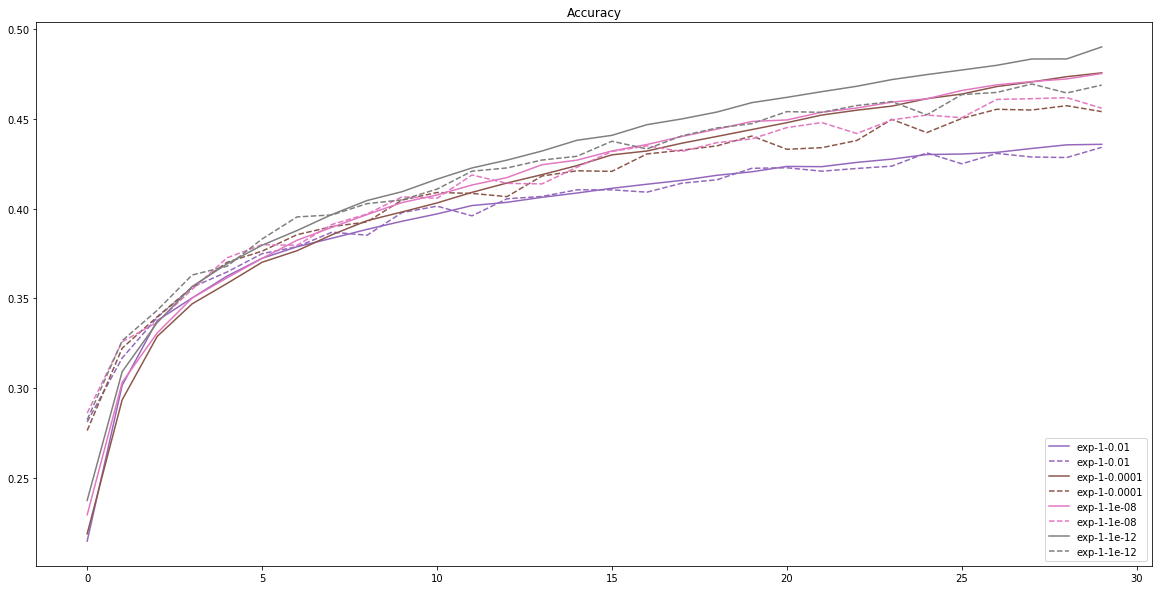

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', "r", "g", "b"]
plt.figure(figsize=(20,10))
for i, cond in enumerate(results.keys()):
    if ("exp-1" in cond):
        plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend(loc=4)
plt.show()

plt.figure(figsize=(20,10))
for i, cond in enumerate(results.keys()):
    if ("exp-1" in cond):
        plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc=4)
plt.show()

In [30]:
results.keys()

dict_keys(['exp-0-0.01', 'exp-0-0.0001', 'exp-0-1e-08', 'exp-0-1e-12', 'exp-1-0.01', 'exp-1-0.0001', 'exp-1-1e-08', 'exp-1-1e-12', 'exp-2-0.01', 'exp-2-0.0001', 'exp-2-1e-08', 'exp-2-1e-12'])